<a href="https://colab.research.google.com/github/paulohenrique1303/Classification-Model/blob/main/Decision_tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from datetime import datetime

## O objetivo é prever se um determinado carro irar ser vendido.  

Abrindo o arquivo

In [ ]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [ ]:
troca = {
    'Unnamed: 0' : 'id',
    'mileage_per_year' : 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns= troca)
dados.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_trocar = {
    'no' : '0',
    'yes' : '1'
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
ano_atual = datetime.today().year

dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [ ]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [ ]:
dados = dados.drop(columns= ['id', 'milhas_por_ano', 'ano_do_modelo'], axis= 1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


Definir features (x) e label(y)

In [ ]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [ ]:
np.random.seed(0)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size= 0.25, stratify= y) 

modelo = DecisionTreeClassifier(max_depth= 3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

accuracy = accuracy_score(previsoes, teste_y)
print(f'A ACURÁCIA DO MODELO FOI DE {accuracy * 100 :.2f}%')

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_dummy = dummy.score(teste_x, teste_y)
print(f'A ACURÁCIA DO DUMMY FOI DE {acuracia_dummy * 100 :.2f}%')

A ACURÁCIA DO MODELO FOI DE 78.84%
A ACURÁCIA DO DUMMY FOI DE 58.00%


Visualização da árvore de decisão

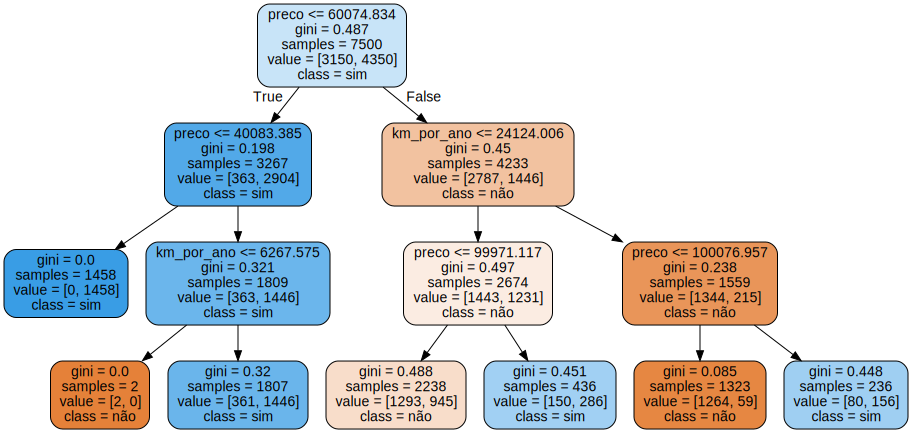

In [ ]:
grafico_dot = export_graphviz(modelo, feature_names= x.columns, filled= True,
                              rounded= True, class_names= ['não', 'sim'])
grafico = graphviz.Source(grafico_dot)
grafico

Esse classificador nos posibilita visualizar as decisões com base nos valores das suas features, facilitando a explicação dos resultados